## Best Way to Split Data

This notebook explores the differences for splitting data into training and testing sets. Specifically, it evaluates two sklearn methods and determines which method is better.

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
test_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


<AxesSubplot:>

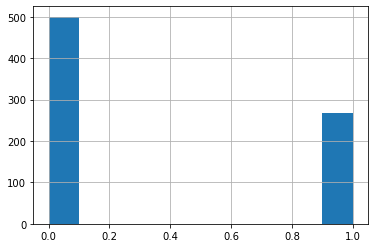

In [6]:
data['Outcome'].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Outcome"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [8]:
# Check the proportion of the original dataset
data["Outcome"].value_counts() / len(data)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [9]:
# Check the proportion of the sklearn train_test_split method
test_set["Outcome"].value_counts() / len(test_set)

0    0.642857
1    0.357143
Name: Outcome, dtype: float64

In [10]:
# Check the proportion of the sklearn StratifiedShuffleSplit method
strat_test_set["Outcome"].value_counts() / len(strat_test_set)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

### Stratisfied is better!

In [12]:
# Comparing random samples versus stratisfied samples (stratisfied are better)
def proportions(data):
    return data["Outcome"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Original": proportions(data),
    "StratifiedShuffleSplit": proportions(strat_test_set),
    "train_test_split": proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["train_test_split"] / compare_props["Original"] - 100
compare_props["Strat. %error"] = 100 * compare_props["StratifiedShuffleSplit"] / compare_props["Original"] - 100

In [13]:
compare_props

,Original,StratifiedShuffleSplit,train_test_split,Rand. %error,Strat. %error
0,0.651042,0.649351,0.642857,-1.257143,-0.25974
1,0.348958,0.350649,0.357143,2.345416,0.48459
